<a href="https://colab.research.google.com/github/shumshersubashgautam/YoloV8-Birds-Nepali-Names/blob/main/YOLOV8_Chitwan_Birds_Classify_NepaliNames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Mon May 15 13:56:17 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!ls

sample_data


In [4]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()
     

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.5/78.2 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

In [6]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 6.23M/6.23M [00:00<00:00, 263MB/s]

2023-05-15 13:58:21.777511: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-15 13:58:22.749497: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 104k/104k [00:00<00:00, 36.2MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 57.9ms
Speed: 0.6ms pre-process, 57.9ms inference, 301.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


/content


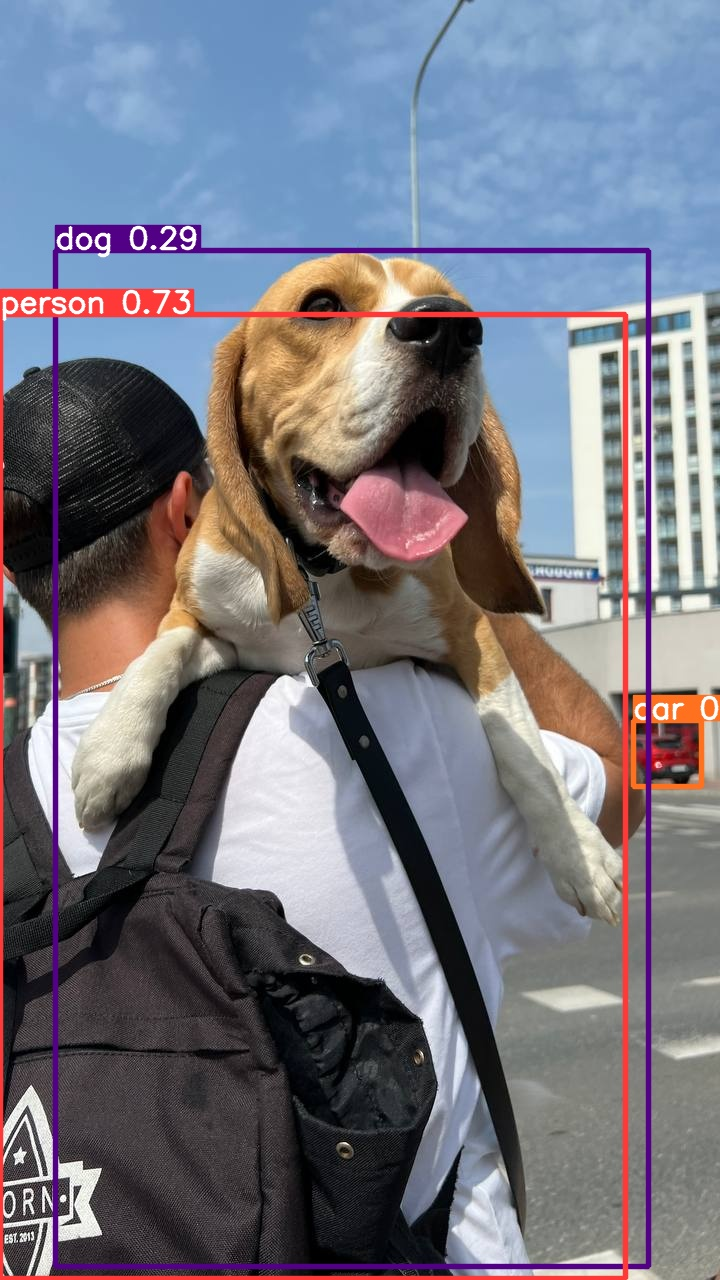

In [7]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

In [8]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg


In [9]:
results[0].boxes.xyxy

tensor([[   0.,  314.,  625., 1278.],
        [  55.,  250.,  648., 1266.],
        [ 633.,  720.,  701.,  786.]], device='cuda:0')

In [10]:
results[0].boxes.conf

tensor([0.72713, 0.29066, 0.28456], device='cuda:0')

In [11]:
results[0].boxes.cls


tensor([ 0., 16.,  2.], device='cuda:0')

In [24]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/data.yaml epochs=25 imgsz=800 plots=True

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, 

In [25]:
!ls {HOME}/runs/detect/train/

args.yaml  weights


In [20]:
!mv  /content/data.yaml /content/bird

/content


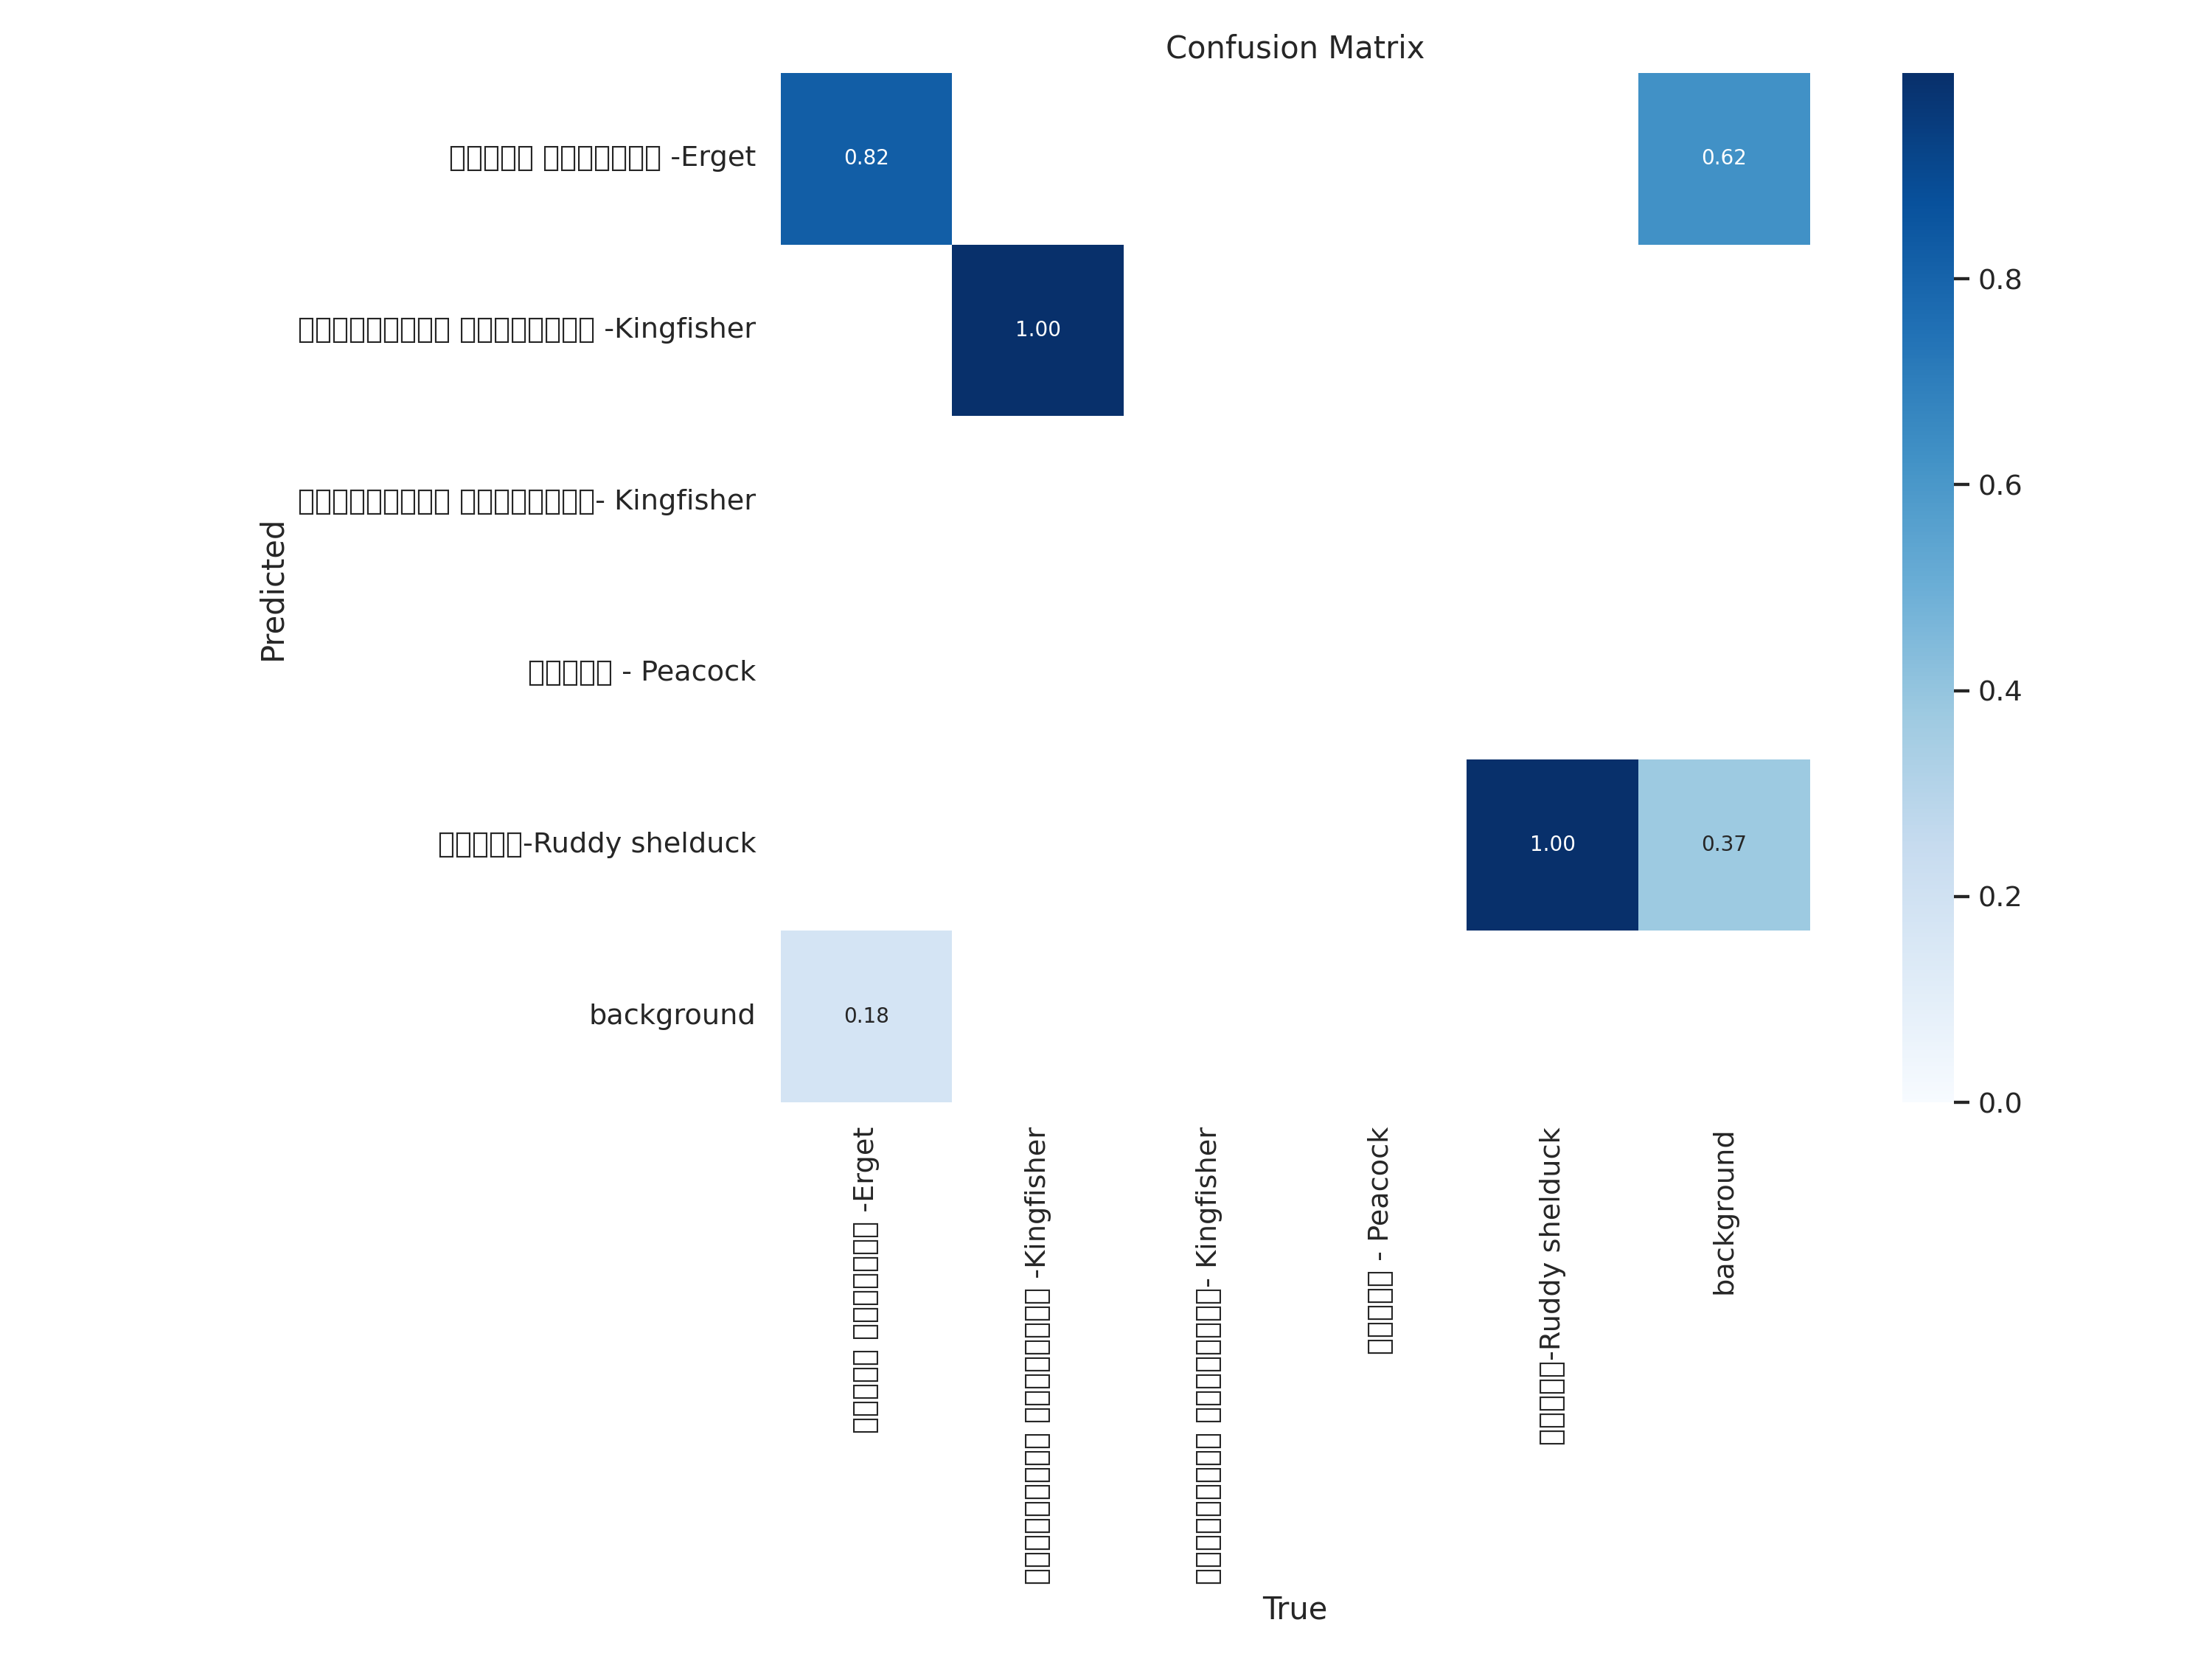

In [27]:
%cd {HOME}
Image(filename=f'/content/runs/detect/train4/confusion_matrix.png', width=600)

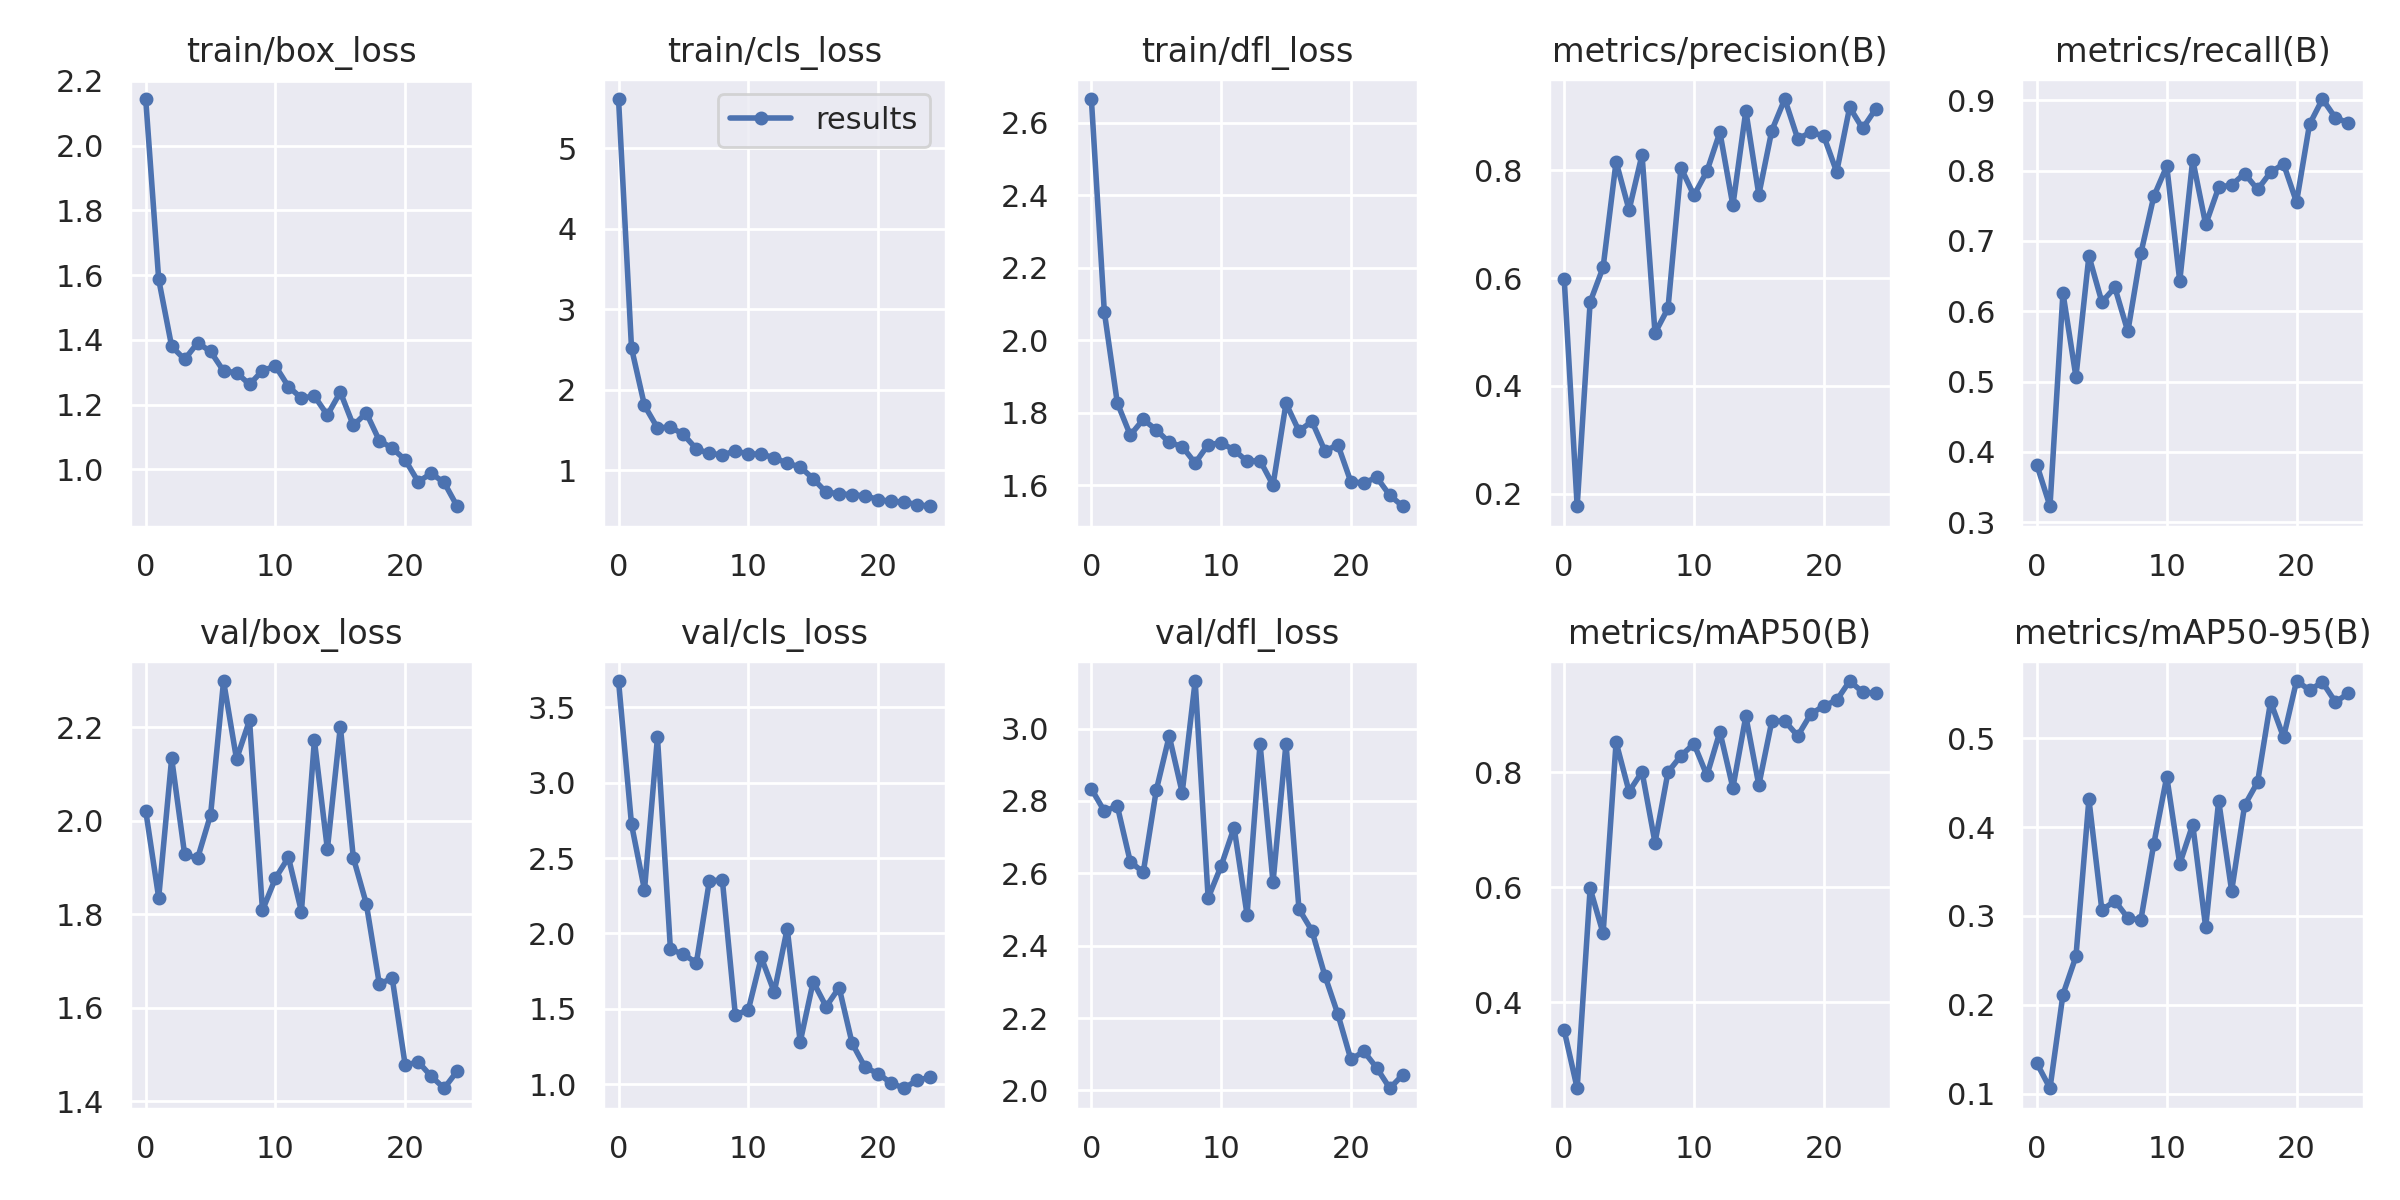

In [28]:
Image(filename=f'/content/runs/detect/train4/results.png', width=600)

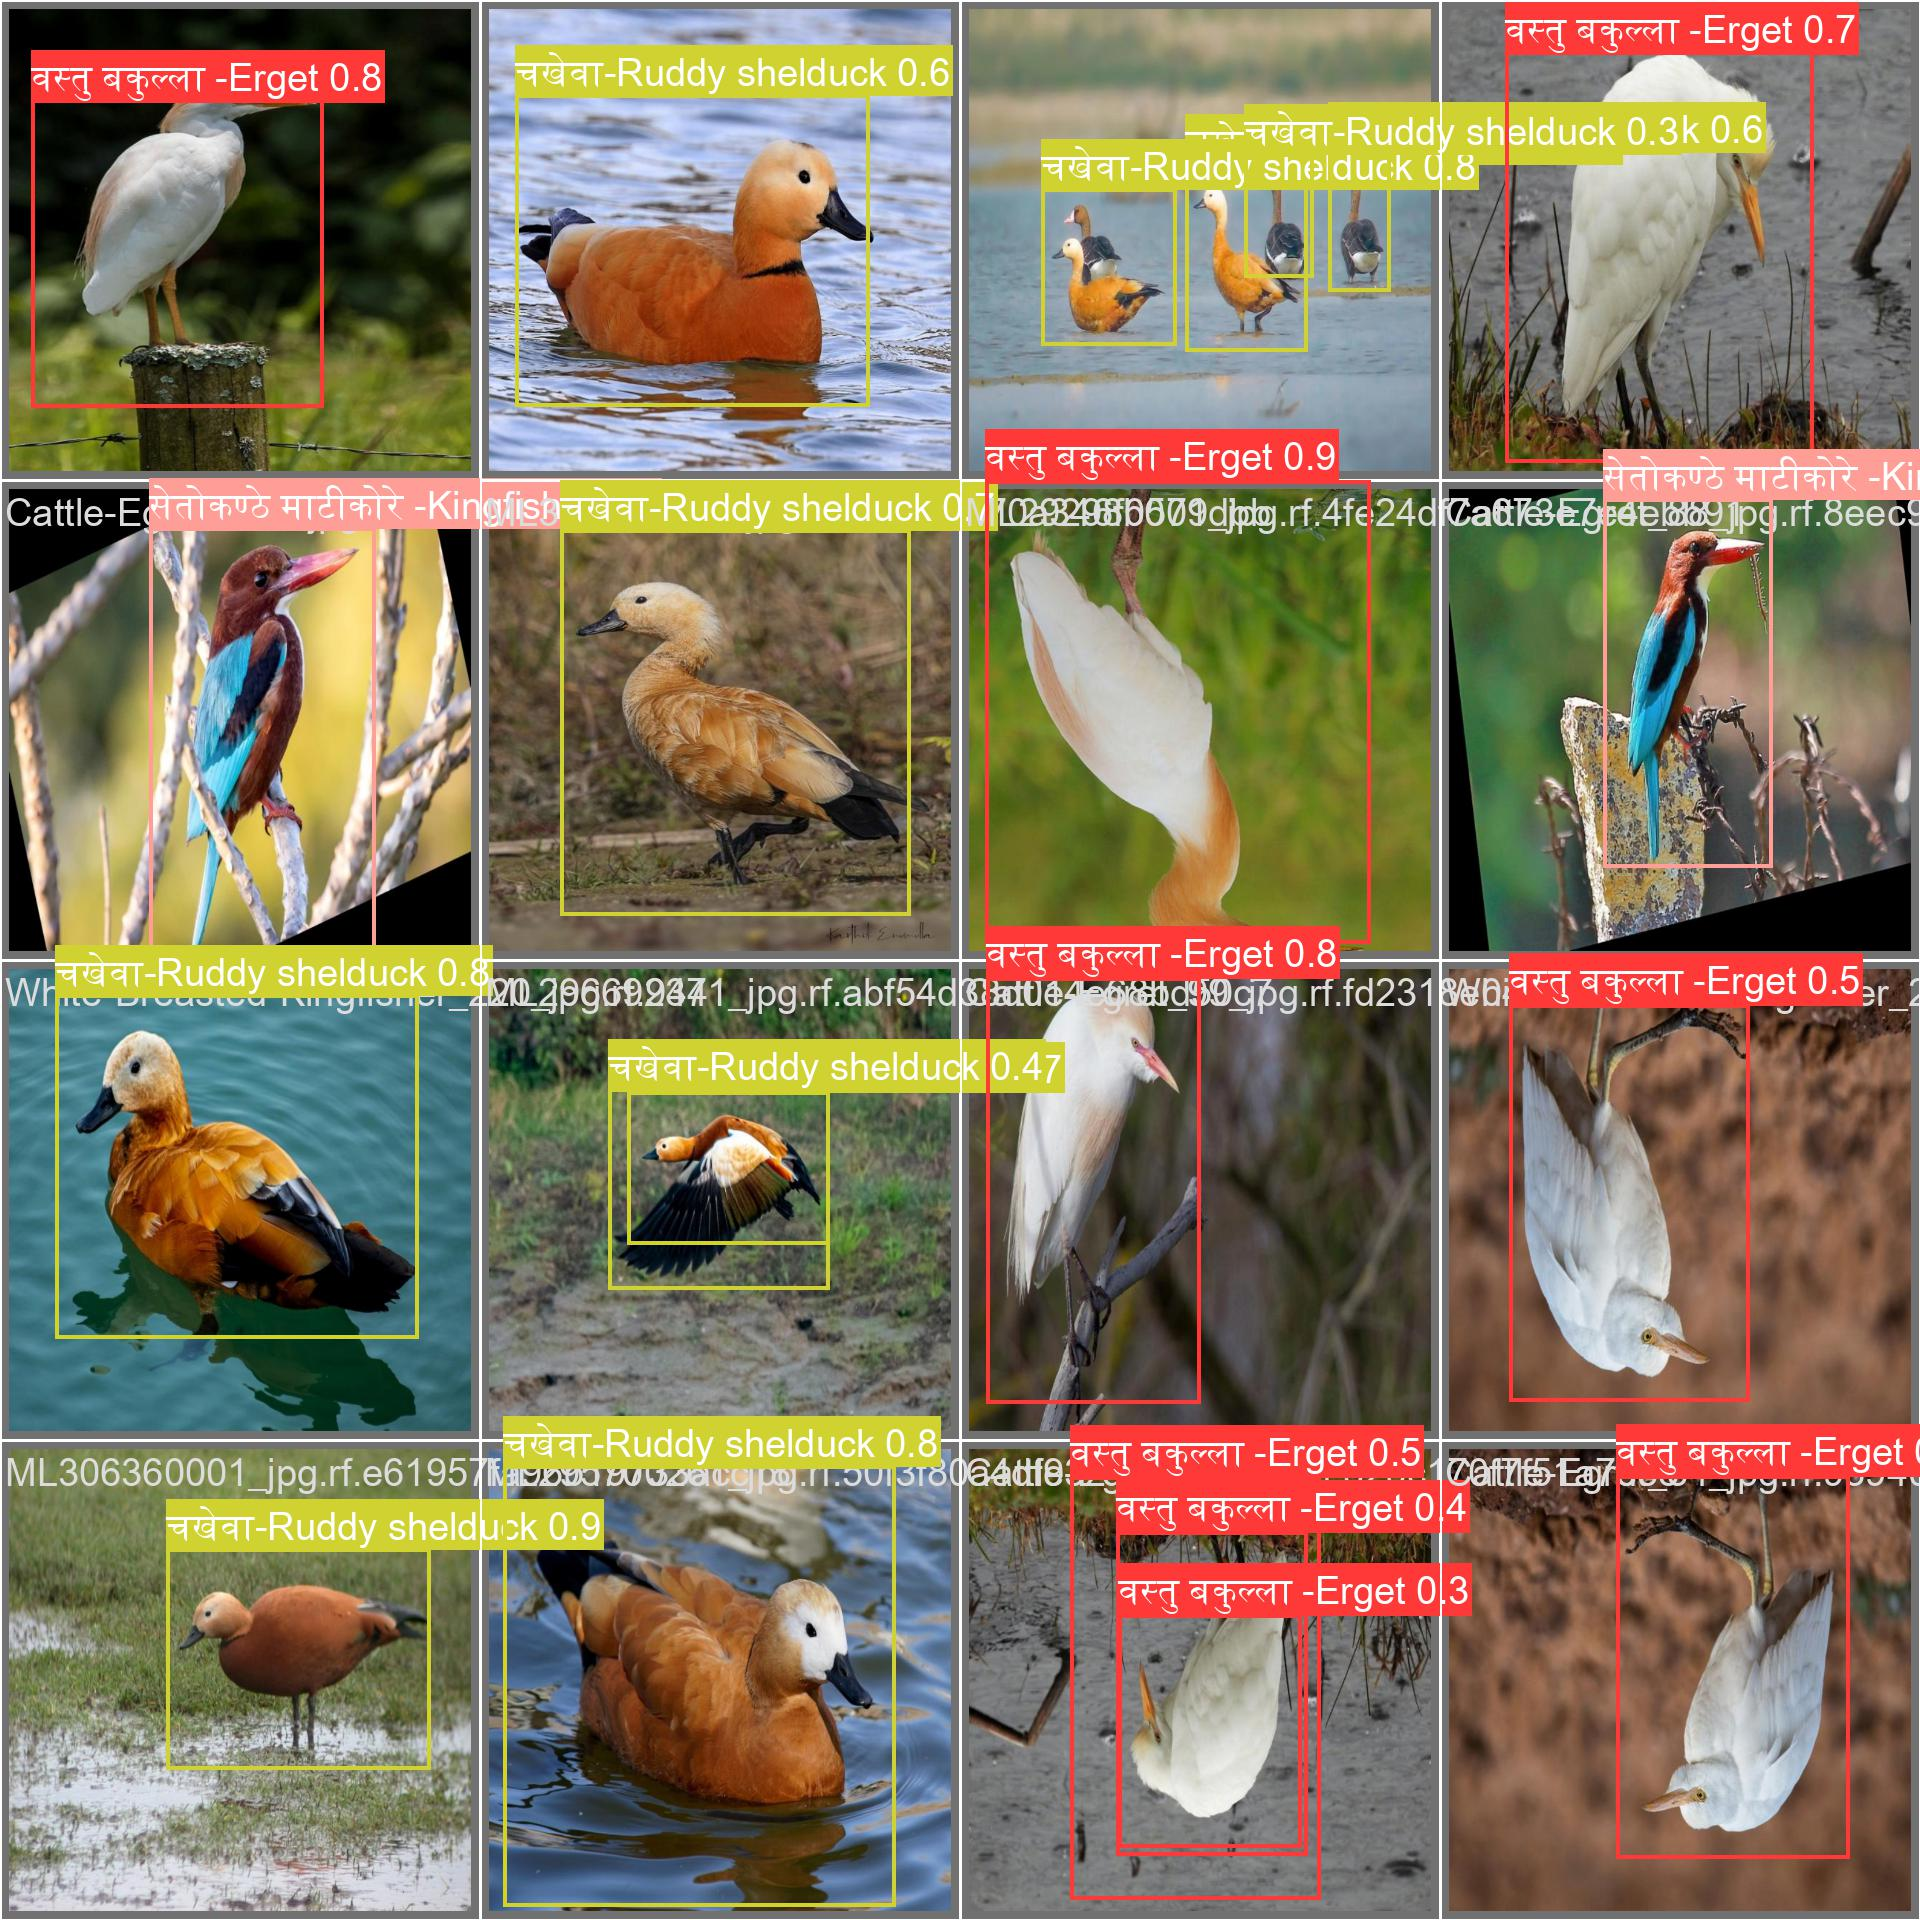

In [29]:
Image(filename=f'/content/runs/detect/train4/val_batch0_pred.jpg', width=600)

In [30]:
!yolo task=detect mode=val model=/content/runs/detect/train4/weights/best.pt data=/content/data.yaml

2023-05-15 14:27:19.526034: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/valid/labels.cache... 29 images, 0 backgrounds, 0 corrupt: 100% 29/29 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.35it/s]
/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/utils/metrics.py:292: UserWarning: Glyph 2357 (\N{DEVANAGARI LETTER VA}) missing from current font.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/utils/metrics.py:292: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/utils/metrics.py:292: UserWarning: Glyph 23

In [36]:
!yolo task=detect mode=predict model=/content/runs/detect/train4/weights/best.pt conf=0.25 source=/content/valid/images  plots = True

2023-05-15 14:37:44.184676: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
image 1/29 /content/valid/images/Cattle-Egret_104_jpg.rf.113c78723225415c93c8c88e48460df8.jpg: 800x800 1 वस्तु बकुल्ला -Erget, 24.6ms
image 2/29 /content/valid/images/Cattle-Egret_110_jpg.rf.037b202493abb418f9a92e959384c4d6.jpg: 800x800 1 वस्तु बकुल्ला -Erget, 24.7ms
image 3/29 /content/valid/images/Cattle-Egret_113_jpg.rf.bda5a5e0c5224ca8b721ab28bc67a097.jpg: 800x800 1 वस्तु बकुल्ला -Erget, 24.6ms
image 4/29 /content/valid/images/Cattle-Egret_12_jpg.rf.a6280dc168761dcfd9be2af8f31055ee.jpg: 800x800 1 वस्तु बकुल्ला -Erget, 24.6ms
image 5/29 /content/valid/images/Cattle-Egret_17_jpg.rf.b35008d914710f2e5a1b56f85200c403.jpg: 800x800 1 वस्तु बकुल्ला -Erget, 24.6ms
image 6/29 /content/valid/images/Cattle-

In [35]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [37]:
!yolo task=detect mode=val model=/content/runs/detect/train4/weights/best.pt data=/content/data.yaml

2023-05-15 14:42:37.183361: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/valid/labels.cache... 29 images, 0 backgrounds, 0 corrupt: 100% 29/29 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.13it/s]
/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/utils/metrics.py:292: UserWarning: Glyph 2357 (\N{DEVANAGARI LETTER VA}) missing from current font.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/utils/metrics.py:292: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/utils/metrics.py:292: UserWarning: Glyph 23

In [43]:
!yolo task=detect mode=predict model=/content/runs/detect/train4/weights/best.pt conf=0.25 source=/content/valid/images save=True

2023-05-15 14:51:19.481530: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/cfg/__init__.py", line 249, in entrypoint
    getattr(model, mode)(verbose=True, **overrides)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/engine/model.py", line 146, in predict
    return self.predictor(source=source, stream=stream, verbose=verbose)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return fu

In [45]:

     !yolo task=detect mode=predict model=/content/runs/detect/train4/weights/best.pt conf=0.25 source=/content/valid/images/White-Breasted-Kingfisher_220_jpg.rf.9441a45a9461777bffe39c7bf39f1ae5.jpg 
     

2023-05-15 15:05:29.133975: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
image 1/1 /content/valid/images/White-Breasted-Kingfisher_220_jpg.rf.9441a45a9461777bffe39c7bf39f1ae5.jpg: 800x800 1 सेतोकण्ठे माटीकोरे -Kingfisher, 24.6ms
Speed: 0.8ms pre-process, 24.6ms inference, 78.9ms postprocess per image at shape (1, 3, 800, 800)
